### Mean Shift Clustering Algorithm:

Mean Shift is a density-based clustering algorithm that:

.   Does not require K (number of clusters)

.   Finds clusters by locating dense regions

.   Works well when clusters are arbitrarily shaped


### Steps used by this Algorithm:-

1.  Import all the necessary Libraries

2.  Create a Realistic Dataset

3.  Estimate Bandwidth (Key Step)

4.  Train Mean Shift Model

5.  Extract Results

6.  Visualize Clusters

7.  Business Interpretation

### Step 1:   Import all the necessary Libraries

In [68]:
import numpy              as  np
import pandas             as  pd
import matplotlib.pyplot  as  plt
import seaborn            as  sns

from   sklearn.cluster          import  MeanShift, estimate_bandwidth
from   sklearn.datasets         import  make_blobs
from   sklearn.model_selection  import  train_test_split
from   sklearn.preprocessing    import  StandardScaler

### Step 2: Create a Realistic Dataset

In [69]:
X, _ = make_blobs(
    n_samples=600,
    centers=4,
    cluster_std=[1.2, 0.8, 1.5, 0.6],
    random_state=42
)


## print(X)


sc = StandardScaler()

X_scaled = sc.fit_transform(X)

print(X_scaled)

[[-0.88954419 -1.87133757]
 [-0.5869652  -1.49080126]
 [-0.19302484 -1.32695489]
 ...
 [ 0.03902012  1.00348633]
 [-0.96695029  0.55852153]
 [-0.02833074  0.9224906 ]]


### Step 3: Estimate Bandwidth (Key Step)

In [70]:
### Automatically estimate the bandwidth

bandwidth = estimate_bandwidth(
    X_scaled                            ,
    quantile=  0.2                      ,
    n_samples= 500
)

print(f"Estimated Bandwidth: {bandwidth:.2f}")

Estimated Bandwidth: 0.44


### OBSERVATIONS:

1.  Smaller the bandwidth --------------->    larger is the cluster

2.  Higher the bandwidth  --------------->    smaller is the cluster

### Step 4:  Train Mean Shift Model

In [71]:
mean_shift = MeanShift(
    bandwidth= bandwidth   ,
    bin_seeding= True
)

### Train the model

mean_shift.fit(X_scaled)

MeanShift(bandwidth=np.float64(0.4352096822862604), bin_seeding=True)

### Step 5:  Extract Results

In [72]:
labels = mean_shift.labels_

print(labels)

[3 3 3 3 1 1 3 2 3 3 2 1 0 0 2 2 1 0 1 1 2 0 3 2 0 1 3 1 1 3 3 3 2 1 1 0 2
 1 0 2 1 1 1 3 3 0 2 0 2 1 1 0 0 2 1 2 3 1 2 3 2 3 3 0 2 1 2 0 0 0 2 3 1 3
 0 0 1 0 3 3 3 2 3 1 0 0 3 0 0 0 2 0 3 2 2 1 3 0 0 2 3 2 2 0 2 0 3 2 1 1 0
 0 2 2 0 3 3 0 1 0 2 2 2 3 0 2 3 0 3 1 2 0 2 1 1 3 3 1 3 3 2 3 2 1 2 0 0 0
 0 2 1 2 3 0 3 3 1 0 0 2 1 2 2 0 2 1 1 0 2 2 1 0 0 2 1 0 0 1 3 0 2 2 0 3 2
 1 2 0 1 3 3 0 2 1 3 2 1 1 1 1 0 3 1 1 0 0 0 2 3 1 1 2 1 1 0 3 1 1 2 0 2 3
 1 2 2 0 0 0 3 2 2 0 2 2 3 3 1 0 3 2 2 1 1 3 2 3 2 0 0 1 3 1 1 3 1 0 3 2 1
 1 2 0 3 3 3 1 2 2 1 2 1 1 2 3 3 0 2 3 1 3 2 3 2 2 3 3 1 1 0 1 1 1 1 3 3 0
 3 2 2 3 3 0 2 2 1 2 2 3 2 0 3 1 1 1 0 3 2 2 2 0 1 3 3 0 0 3 1 3 3 3 1 3 0
 1 2 2 3 2 3 3 0 1 1 0 1 2 2 1 3 0 1 3 3 2 1 0 2 3 0 2 3 1 3 3 0 1 2 2 3 1
 2 1 2 0 3 0 1 3 0 2 2 2 3 1 1 3 3 3 0 2 0 0 0 0 0 2 3 0 3 0 0 2 3 2 3 2 2
 2 0 0 1 2 2 3 3 3 2 2 3 3 3 0 1 0 0 2 0 1 2 1 1 3 1 1 2 1 1 1 1 0 0 3 0 1
 3 3 0 2 3 2 3 0 2 0 1 1 1 3 2 1 2 0 1 0 1 2 3 0 2 3 0 0 1 0 0 1 0 3 1 1 3
 3 3 0 1 0 1 3 3 2 0 2 1 

In [73]:
clusters = mean_shift.cluster_centers_

print(clusters)

[[-1.02116375  0.71162532]
 [ 1.52525661 -0.15537744]
 [ 0.12653134  0.97926476]
 [-0.66819888 -1.55723146]]


In [74]:
n_clusters = len(np.unique(labels))

print(f"Number of clusters found: {n_clusters}")

Number of clusters found: 4


### Step 6:  Visualize Clusters

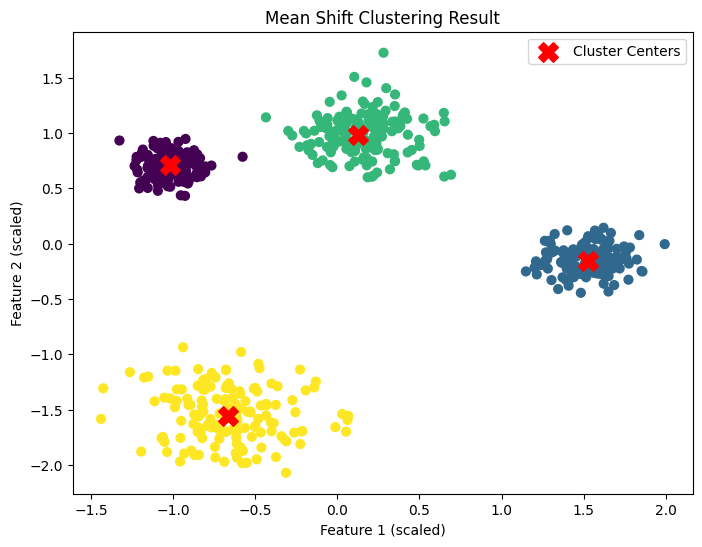

In [75]:
plt.figure(figsize=(8, 6))

plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=labels,
    cmap='viridis',
    s=40
)

plt.scatter(
    clusters[:, 0],
    clusters[:, 1],
    color='red',
    s=200,
    marker='X',
    label='Cluster Centers'
)

plt.title("Mean Shift Clustering Result")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()


### OBSERVATIONS:

1.  From the above dataset, four group of clusters are formed.

### Step 7: Business Interpretation

In [76]:
### Count customers in each cluster

unique, counts = np.unique(labels, return_counts = True)


for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} data points")

Cluster 0: 151 data points
Cluster 1: 150 data points
Cluster 2: 149 data points
Cluster 3: 150 data points


Business Insight Example

1.  Large cluster → majority customer group

2.  Small cluster → niche segment

3.  Can be used for targeted marketing